In [1]:
# Step 1: Load and Explore the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\atanu\OneDrive\Desktop\data science assignment\Timeseries\exchange_rate.csv",parse_dates=['date'], index_col='date')
df = df.asfreq('D')  # ensure daily frequency
df = df.fillna(method='ffill')  # handle missing values
df.columns

Index(['Ex_rate'], dtype='object')

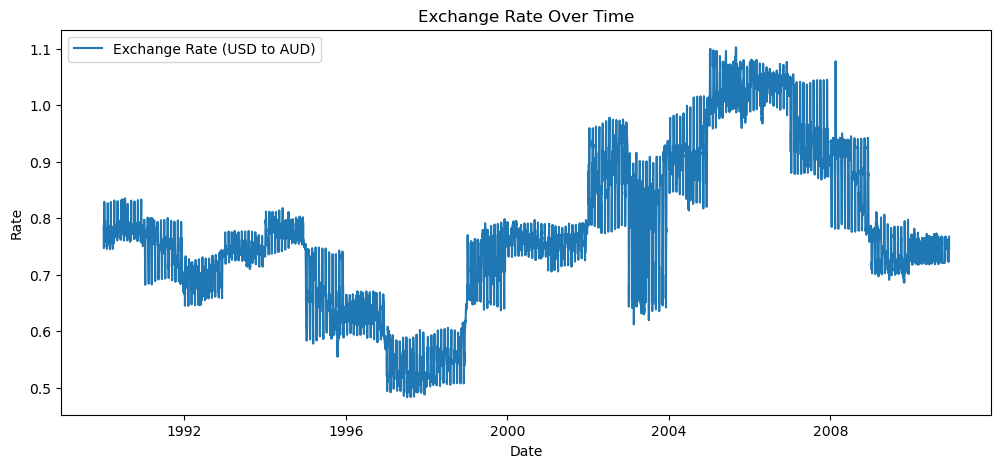

In [3]:
# Plot time series
plt.figure(figsize=(12, 5))
plt.plot(df, label='Exchange Rate (USD to AUD)')
plt.title("Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.show()



<Figure size 1200x400 with 0 Axes>

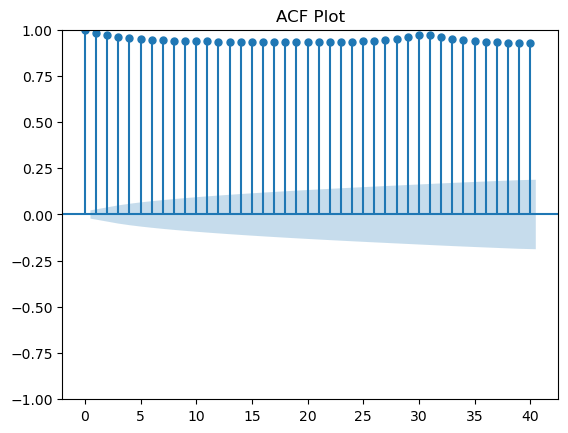

<Figure size 1200x400 with 0 Axes>

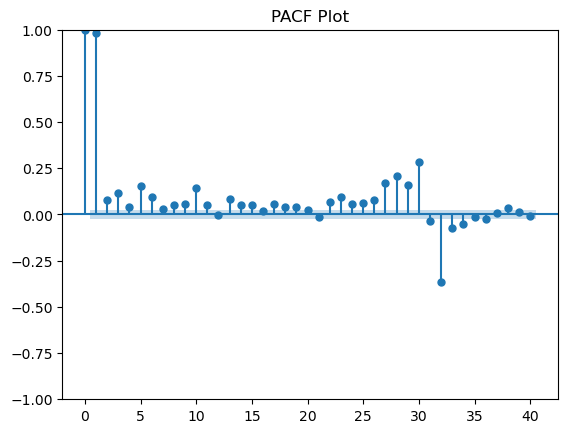

In [4]:
# Step 2: ACF and PACF for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))
plot_acf(df, lags=40)
plt.title("ACF Plot")
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(df, lags=40)
plt.title("PACF Plot")
plt.show()

In [5]:
# Step 3: Fit ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [6]:
# Assume p=5, d=1, q=2 from ACF/PACF analysis (can tune these)
model_arima = ARIMA(df, order=(5, 1, 2))
arima_result = model_arima.fit()
print(arima_result.summary())

C:\Users\atanu\.ipython\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7648
Model:                 ARIMA(5, 1, 2)   Log Likelihood               18085.070
Date:                Wed, 21 May 2025   AIC                         -36154.140
Time:                        17:11:43   BIC                         -36098.604
Sample:                    01-01-1990   HQIC                        -36135.088
                         - 12-09-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0441      1.025     -0.043      0.966      -2.052       1.964
ar.L2          0.5636      0.786      0.717      0.473      -0.976       2.103
ar.L3          0.0070      0.061      0.116      0.9

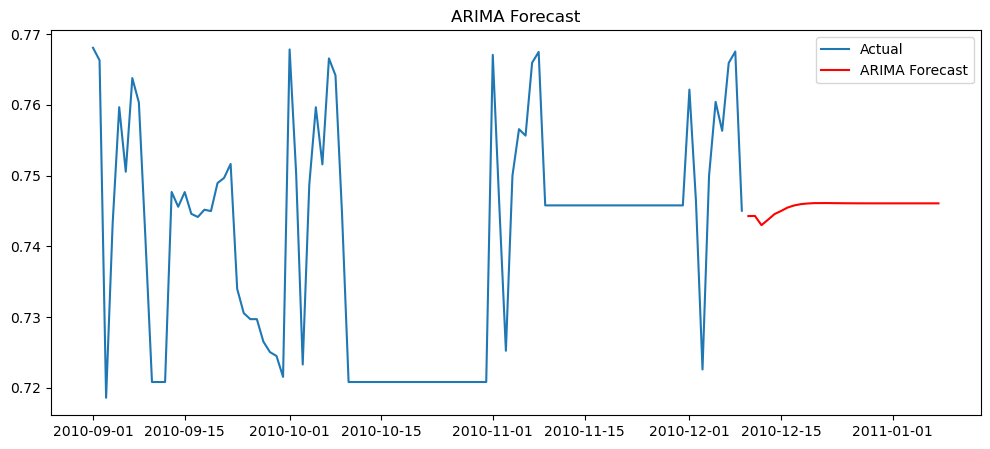

In [8]:
# Forecast with ARIMA
forecast_arima = arima_result.forecast(steps=30)

plt.figure(figsize=(12, 5))
plt.plot(df[-100:], label="Actual")
plt.plot(forecast_arima, label="ARIMA Forecast", color='red')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()



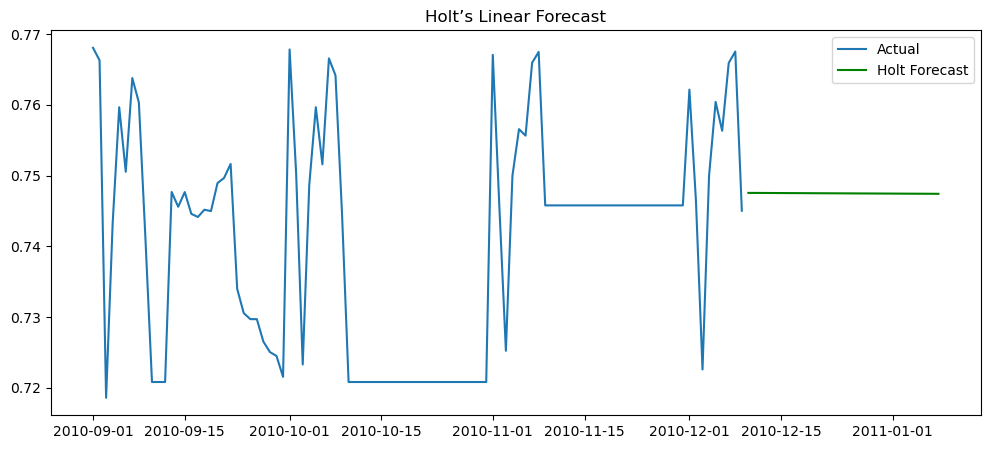

In [9]:
# Step 4: Exponential Smoothing (Holt’s Linear Trend)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_holt = ExponentialSmoothing(df, trend='add', seasonal=None)
holt_result = model_holt.fit()
forecast_holt = holt_result.forecast(30)

plt.figure(figsize=(12, 5))
plt.plot(df[-100:], label="Actual")
plt.plot(forecast_holt, label="Holt Forecast", color='green')
plt.title("Holt’s Linear Forecast")
plt.legend()
plt.show()



In [11]:
# Step 5: Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Compare last 30 actual values
test_actual = df[-30:]
test_arima = arima_result.predict(start=len(df)-30, end=len(df)-1)
test_holt = holt_result.fittedvalues[-30:]

def evaluate(true, pred):
    true = np.array(true)
    pred = np.array(pred)

    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    return mae, rmse, mape

arima_scores = evaluate(test_actual, test_arima)
holt_scores = evaluate(test_actual, test_holt)

print("\n🔍 Evaluation Metrics (last 30 days):")
print(f"ARIMA -> MAE: {arima_scores[0]:.4f}, RMSE: {arima_scores[1]:.4f}, MAPE: {arima_scores[2]:.2f}%")
print(f"Holt  -> MAE: {holt_scores[0]:.4f}, RMSE: {holt_scores[1]:.4f}, MAPE: {holt_scores[2]:.2f}%")



🔍 Evaluation Metrics (last 30 days):
ARIMA -> MAE: 0.0052, RMSE: 0.0083, MAPE: 0.91%
Holt  -> MAE: 0.0044, RMSE: 0.0091, MAPE: 0.84%
